In [1]:
import plotly.tools as tls
import cufflinks as cf
import pandas as pd
import numpy as np
import cx_Oracle
import ephem
import matplotlib.pyplot as plt
import plotly.plotly as py
from astroML.plotting import plot_tissot_ellipse
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
df = pd.read_csv('data_files/baseline_channels_phase.txt', sep=' ')

In [3]:
df.ix[0,1]

0.0

In [4]:
df.head()

,x,y,chan,scan,field,ant1,ant2,ant1name,ant2name,time,freq,spw,corr,offset,currchunk,irel
0,668.836,0,10,1,0,0,0,CM01@N602,CM01@N602,4.925950e+09,668.835938,1,XX,0,0,0
1,668.820,0,11,1,0,0,0,CM01@N602,CM01@N602,4.925950e+09,668.820312,1,XX,1,0,1
2,668.805,0,12,1,0,0,0,CM01@N602,CM01@N602,4.925950e+09,668.804688,1,XX,2,0,2
3,668.789,0,13,1,0,0,0,CM01@N602,CM01@N602,4.925950e+09,668.789062,1,XX,3,0,3
4,668.773,0,14,1,0,0,0,CM01@N602,CM01@N602,4.925950e+09,668.773438,1,XX,4,0,4


In [5]:
data_group = df.groupby(['ant1name', 'ant2name'])

In [6]:
data_group.agg({'freq': np.mean, 'chan': np.count_nonzero})

freq  chan
ant1name  ant2name                   
CM01@N602 CM01@N602  668.015625   106
          CM03@J503  668.015625   106
          CM04@N605  668.015625   106
          CM05@J506  668.015625   106
          CM06@N606  668.015625   106
          CM07@N601  668.015625   106
          CM08@J505  668.015625   106
          CM10@J501  668.015625   106
          CM11@N604  668.015625   106
          CM12@J504  668.015625   106
          DA41@A137  668.015625   106
          DA42@A006  668.015625   106
          DA43@A040  668.015625   106
          DA45@A030  668.015625   106
          DA46@A058  668.015625   106
          DA47@A070  668.015625   106
          DA48@A043  668.015625   106
          DA49@A029  668.015625   106
          DA50@A071  668.015625   106
          DA51@A013  668.015625   106
          DA52@A035  668.015625   106
          DA53@A069  668.015625   106
          DA54@A019  668.015625   106
          DA55@A060  668.015625   106
          DA56@A028  668.015625   106
          DA58@A001  668.015625   106
          DA60@A036  668.015625   106
          DA61@A075  668.015625   106
          DA62@A046  668.015625   106
          DA63@A018  668.015625   106
...                         ...   ...
DV19@A033 PM03@T701  668.015625   106
          PM04@T703  668.015625   106
DV20@A034 DV20@A034  668.015625   106
          DV21@A003  668.015625   106
          DV22@A011  668.015625   106
          DV24@A004  668.015625   106
          DV25@A005  668.015625   106
          PM03@T701  668.015625   106
          PM04@T703  668.015625   106
DV21@A003 DV21@A003  668.015625   106
          DV22@A011  668.015625   106
          DV24@A004  668.015625   106
          DV25@A005  668.015625   106
          PM03@T701  668.015625   106
          PM04@T703  668.015625   106
DV22@A011 DV22@A011  668.015625   106
          DV24@A004  668.015625   106
          DV25@A005  668.015625   106
          PM03@T701  668.015625   106
          PM04@T703  668.015625   106
DV24@A004 DV24@A004  668.015625   106
          DV25@A005  668.015625   106
          PM03@T701  668.015625   106
          PM04@T703  668.015625   106
DV25@A005 DV25@A005  668.015625   106
          PM03@T701  668.015625   106
          PM04@T703  668.015625   106
PM03@T701 PM03@T701  668.015625   106
          PM04@T703  668.015625   106
PM04@T703 PM04@T703  668.015625   106

[1596 rows x 2 columns]

In [7]:
data_raw = df.groupby(['ant1name', 'ant2name', 'chan']).y.mean()
data_raw.head(30)

ant1name   ant2name   chan
CM01@N602  CM01@N602  10      0
                      11      0
                      12      0
                      13      0
                      14      0
                      15      0
                      16      0
                      17      0
                      18      0
                      19      0
                      20      0
                      21      0
                      22      0
                      23      0
                      24      0
                      25      0
                      26      0
                      27      0
                      28      0
                      29      0
                      30      0
                      31      0
                      32      0
                      33      0
                      34      0
                      35      0
                      36      0
                      37      0
                      38      0
                      39      0
Name: y, dtyp

In [9]:
data_raw.unstack().head(20)

chan                       10        11        12        13        14   \
ant1name  ant2name                                                       
CM01@N602 CM01@N602    0.00000    0.0000    0.0000    0.0000    0.0000   
          CM03@J503  119.24900  169.0460  102.5290 -104.8860  -78.0917   
          CM04@N605   45.43740   92.9609  116.0210  169.3490  166.5690   
          CM05@J506  131.68200   86.8202   49.1596   10.9295  -72.4744   
          CM06@N606 -178.21000 -178.4090 -110.0760  -95.0222  -84.9869   
          CM07@N601  147.40400 -171.8050 -144.7090  -38.3456   39.4725   
          CM08@J505   95.55720   73.0508   35.2176  110.6240  128.2540   
          CM10@J501  101.98600   79.5625   77.8314  110.7760  122.3410   
          CM11@N604  161.34800  174.2700  163.6100   80.5969  113.5180   
          CM12@J504  119.05500  121.8720  136.1640  173.8980 -163.5070   
          DA41@A137 -130.33100 -156.4520  -99.9428 -103.5750  -66.1071   
          DA42@A006 -124.36300 -157.2230 -138.7740 -124.3080 -118.1820   
          DA43@A040 -146.40200 -149.3630 -160.9910 -178.2590 -164.8990   
          DA45@A030   98.51170   11.5138 -164.7450   99.9460   68.8387   
          DA46@A058 -158.70000 -153.2470 -172.2350  159.1190  161.5090   
          DA47@A070  -15.74610   15.7908   33.3850   10.5747  -14.4184   
          DA48@A043    6.81436  178.6030   38.8845   42.2898   21.0232   
          DA49@A029  143.21400  132.3750  107.2970   74.3578  101.3100   
          DA50@A071  168.28900  146.7620  154.0180 -170.8910 -160.6360   
          DA51@A013  151.84600  106.8340   79.5484  124.6010  134.4360   

chan                      15         16        17        18        19   \
ant1name  ant2name                                                       
CM01@N602 CM01@N602    0.0000    0.00000    0.0000    0.0000    0.0000   
          CM03@J503 -176.3090  146.73200  150.1010  177.3970  -88.9292   
          CM04@N605  144.2310  102.51600  100.6270  100.0930   87.5194   
          CM05@J506  -71.0753   16.69920  101.2730  101.1130   86.2734   
          CM06@N606  -79.7229  -67.12860  -91.4502 -107.0210  -93.7782   
          CM07@N601  -87.2073  -93.67820 -145.8190  178.2820  168.5510   
          CM08@J505  -27.7585  -63.22120  129.6570   99.3350   57.8750   
          CM10@J501 -148.7990 -134.28400 -123.5460   71.8619   74.2967   
          CM11@N604  130.4930  108.58900  111.6230  105.8800  110.1710   
          CM12@J504 -173.1180  131.34100  130.1460  153.1080 -169.6630   
          DA41@A137  -63.1504  -69.67690  -54.9684  -14.6419  -85.1261   
          DA42@A006 -128.9010 -133.86300 -149.9040 -140.4700 -110.7320   
          DA43@A040 -155.1330 -164.94800 -169.8600 -172.8960  157.4610   
          DA45@A030   66.6444  150.29900  162.9180  146.1510  113.7970   
          DA46@A058  159.2200  152.12700 -172.7440 -161.9930 -178.5890   
          DA47@A070  -21.5713  -41.87790  -17.1930  -33.4326  -37.9348   
          DA48@A043   15.0049    1.80116   16.5801   41.9203   29.2295   
          DA49@A029  112.4040  125.36800  132.6340  131.4290  163.2370   
          DA50@A071  177.8700  152.41800  130.6210  148.1000  152.2490   
          DA51@A013  146.4390  152.15900  156.8210  149.0870  140.9580   

chan                   ...           106        107        108        109  \
ant1name  ant2name     ...                                                  
CM01@N602 CM01@N602    ...       0.00000    0.00000    0.00000    0.00000   
          CM03@J503    ...     142.96400  -98.13010 -116.80100 -169.71200   
          CM04@N605    ...      54.89670  119.35800   55.09750   54.75000   
          CM05@J506    ...     126.60700   89.19310   81.73680   53.02950   
          CM06@N606    ...     -84.39650 -137.01500  151.39000  147.39100   
          CM07@N601    ...     107.10300  145.03900  142.07400  136.45700   
          CM08@J505    ...      30.06860  -42.17600  -58.69170  -90.41070   
          CM10@J501    ...    -119.74500  -92.436

In [10]:
pd.options.display.max_columns = 200
data_raw.unstack().head(20)

chan                       10        11        12        13        14   \
ant1name  ant2name                                                       
CM01@N602 CM01@N602    0.00000    0.0000    0.0000    0.0000    0.0000   
          CM03@J503  119.24900  169.0460  102.5290 -104.8860  -78.0917   
          CM04@N605   45.43740   92.9609  116.0210  169.3490  166.5690   
          CM05@J506  131.68200   86.8202   49.1596   10.9295  -72.4744   
          CM06@N606 -178.21000 -178.4090 -110.0760  -95.0222  -84.9869   
          CM07@N601  147.40400 -171.8050 -144.7090  -38.3456   39.4725   
          CM08@J505   95.55720   73.0508   35.2176  110.6240  128.2540   
          CM10@J501  101.98600   79.5625   77.8314  110.7760  122.3410   
          CM11@N604  161.34800  174.2700  163.6100   80.5969  113.5180   
          CM12@J504  119.05500  121.8720  136.1640  173.8980 -163.5070   
          DA41@A137 -130.33100 -156.4520  -99.9428 -103.5750  -66.1071   
          DA42@A006 -124.36300 -157.2230 -138.7740 -124.3080 -118.1820   
          DA43@A040 -146.40200 -149.3630 -160.9910 -178.2590 -164.8990   
          DA45@A030   98.51170   11.5138 -164.7450   99.9460   68.8387   
          DA46@A058 -158.70000 -153.2470 -172.2350  159.1190  161.5090   
          DA47@A070  -15.74610   15.7908   33.3850   10.5747  -14.4184   
          DA48@A043    6.81436  178.6030   38.8845   42.2898   21.0232   
          DA49@A029  143.21400  132.3750  107.2970   74.3578  101.3100   
          DA50@A071  168.28900  146.7620  154.0180 -170.8910 -160.6360   
          DA51@A013  151.84600  106.8340   79.5484  124.6010  134.4360   

chan                      15         16        17        18        19   \
ant1name  ant2name                                                       
CM01@N602 CM01@N602    0.0000    0.00000    0.0000    0.0000    0.0000   
          CM03@J503 -176.3090  146.73200  150.1010  177.3970  -88.9292   
          CM04@N605  144.2310  102.51600  100.6270  100.0930   87.5194   
          CM05@J506  -71.0753   16.69920  101.2730  101.1130   86.2734   
          CM06@N606  -79.7229  -67.12860  -91.4502 -107.0210  -93.7782   
          CM07@N601  -87.2073  -93.67820 -145.8190  178.2820  168.5510   
          CM08@J505  -27.7585  -63.22120  129.6570   99.3350   57.8750   
          CM10@J501 -148.7990 -134.28400 -123.5460   71.8619   74.2967   
          CM11@N604  130.4930  108.58900  111.6230  105.8800  110.1710   
          CM12@J504 -173.1180  131.34100  130.1460  153.1080 -169.6630   
          DA41@A137  -63.1504  -69.67690  -54.9684  -14.6419  -85.1261   
          DA42@A006 -128.9010 -133.86300 -149.9040 -140.4700 -110.7320   
          DA43@A040 -155.1330 -164.94800 -169.8600 -172.8960  157.4610   
          DA45@A030   66.6444  150.29900  162.9180  146.1510  113.7970   
          DA46@A058  159.2200  152.12700 -172.7440 -161.9930 -178.5890   
          DA47@A070  -21.5713  -41.87790  -17.1930  -33.4326  -37.9348   
          DA48@A043   15.0049    1.80116   16.5801   41.9203   29.2295   
          DA49@A029  112.4040  125.36800  132.6340  131.4290  163.2370   
          DA50@A071  177.8700  152.41800  130.6210  148.1000  152.2490   
          DA51@A013  146.4390  152.15900  156.8210  149.0870  140.9580   

chan                      20        21        22        23        24   \
ant1name  ant2name                                                      
CM01@N602 CM01@N602    0.0000    0.0000    0.0000    0.0000    0.0000   
          CM03@J503  -79.9393  143.7070  106.3650  123.7420  135.5310   
          CM04@N605   79.3345  100.1110  149.8350  160.5080  141.8180   
          CM05@J506   74.9373   61.2820   56.4391   54.2239   55.8448   
          CM06@N606  -98.7878  -76.8274  -42.8996  -65.5560  -93.4447   
          CM07@N601  148.5230  134.8930  120.1000  130.9140  154.5990   
          CM08@J505   18.8690   32.9589   29.3869   33.4058   30.1271   
          CM10@J501   69.7611   71.5650   79.0358   72.7651   62.2095   
          CM

In [11]:
data_raw = data_raw.unstack().reset_index()
data_raw.head()

chan,ant1name,ant2name,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,CM01@N602,CM01@N602,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,CM01@N602,CM03@J503,119.2490,169.0460,102.5290,-104.8860,-78.0917,-176.3090,146.7320,150.1010,177.397,-88.9292,-79.9393,143.7070,106.3650,123.7420,135.5310,129.2260,98.7727,-174.0530,-147.4750,172.1850,83.0470,56.0564,-120.8670,-144.18200,-132.4660,-107.650,-82.9053,-75.2173,-120.8310,-158.1660,173.7230,161.6480,169.0400,163.7060,123.94400,176.47300,-88.58560,-47.86240,-116.5650,-132.1840,-107.8190,-139.3540,-163.8600,135.9780,166.0880,-151.7250,-146.5150,-128.2730,-165.1170,135.4580,-175.8300,-100.6470,-144.2930,150.9240,172.4320,-165.3860,-147.3650,-178.6030,127.9670,150.6290,-157.4330,-178.3630,142.4900,156.3630,-170.7580,-168.25400,166.4610,132.33700,115.4400,-168.7710,-127.5280,124.6340,118.9440,74.05460,42.51040,98.99380,-154.59800,-105.1240,-77.7995,-84.3151,-178.3860,122.9810,166.7920,-171.8320,-141.0310,-131.9710,168.74900,151.9820,179.1320,-133.8310,-129.039,-145.1650,-165.1810,167.8160,153.1120,145.6830,142.9640,-98.1301,-116.8010,-169.7120,-175.5120,-171.7930,165.0460,142.1250,139.2680,177.8790
2,CM01@N602,CM04@N605,45.4374,92.9609,116.0210,169.3490,166.5690,144.2310,102.5160,100.6270,100.093,87.5194,79.3345,100.1110,149.8350,160.5080,141.8180,85.9144,157.4900,139.3590,36.2685,23.1986,74.0800,107.2520,120.2360,173.19100,149.1720,143.130,121.8840,119.8870,112.8980,67.5332,45.1690,63.0272,76.8063,85.8591,87.43620,109.56400,46.73570,5.65442,137.0210,135.7930,116.1850,94.0663,111.4600,140.2790,136.9170,144.0300,157.4020,134.8330,146.7060,-140.3890,125.9420,102.9950,109.5500,112.8680,106.8990,98.2759,101.7780,106.9870,81.3782,50.9415,102.6280,114.9480,126.7220,120.2700,61.6516,45.52240,129.9040,161.47800,-75.6773,2.7263,62.4078,56.1277,48.4012,-5.04245,6.06362,5.15713,1.15344,25.3959,55.8641,86.1142,82.3523,89.2494,94.3524,91.1935,102.5620,38.8114,29.42750,51.9175,73.5707,111.0380,153.072,177.2610,-178.9360,170.8090,150.1010,54.6375,54.8967,119.3580,55.0975,54.7500,63.2238,60.9454,64.6871,68.5523,92.2283,138.0130
3,CM01@N602,CM05@J506,131.6820,86.8202,49.1596,10.9295,-72.4744,-71.0753,16.6992,101.2730,101.113,86.2734,74.9373,61.2820,56.4391,54.2239,55.8448,50.1944,37.5963,24.8057,20.6470,80.5783,117.5880,-172.3600,-57.6193,5.86598,24.5378,150.866,146.5140,67.5838,77.9846,80.4777,69.7897,59.4964,42.7479,20.3231,-5.19443,-9.34467,-1.20606,15.04910,49.3987,72.4884,71.2185,53.8706,60.7439,58.6632,42.2429,39.7751,48.1695,63.7052,57.7040,30.7189,30.9638,64.0300,63.1038,67.2945,70.4976,73.6983,79.8402,94.1704,118.5280,71.1644,46.5677,56.5488,63.9552,64.8922,42.4552,92.86240,-144.0720,9.20038,29.5604,39.8056,38.6598,44.8925,41.2427,23.89250,3.44221,-2.23118,6.76618,77.2314,69.8967,39.7323,17.7633,82.2348,132.0130,81.7610,69.5005,44.8158,5.81009,17.0378,47.7621,56.1966,49.887,27.2269,49.7744,98.2672,138.8140,-180.0000,126.6070,89.1931,81.7368,53.0295,59.3227,96.7098,123.0740,108.3490,84.7126,58.1340
4,CM01@N602,CM06@N6

In [12]:
data_raw.to_excel('test.xls', index=False)

In [13]:
todegclean = np.degrees(np.arcsin(np.sin(np.radians(data_raw.iloc[:,2:]))))

In [14]:
todegclean.head()

chan,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,60.7510,10.9540,77.4710,-75.1140,-78.0917,-3.6910,33.2680,29.8990,2.603,-88.9292,-79.9393,36.2930,73.6350,56.2580,44.4690,50.7740,81.2273,-5.9470,-32.5250,7.8150,83.0470,56.0564,-59.1330,-35.81800,-47.5340,-72.350,-82.9053,-75.2173,-59.1690,-21.8340,6.2770,18.3520,10.9600,16.2940,56.05600,3.52700,-88.58560,-47.86240,-63.4350,-47.8160,-72.1810,-40.6460,-16.1400,44.0220,13.9120,-28.2750,-33.4850,-51.7270,-14.8830,44.5420,-4.1700,-79.3530,-35.7070,29.0760,7.5680,-14.6140,-32.6350,-1.3970,52.0330,29.3710,-22.5670,-1.6370,37.5100,23.6370,-9.2420,-11.74600,13.5390,47.66300,64.5600,-11.2290,-52.4720,55.3660,61.0560,74.05460,42.51040,81.00620,-25.40200,-74.8760,-77.7995,-84.3151,-1.6140,57.0190,13.2080,-8.1680,-38.9690,-48.0290,11.25100,28.0180,0.8680,-46.1690,-50.961,-34.8350,-14.8190,12.1840,26.8880,3.431700e+01,37.0360,-81.8699,-63.1990,-10.2880,-4.4880,-8.2070,14.9540,37.8750,40.7320,2.1210
2,45.4374,87.0391,63.9790,10.6510,13.4310,35.7690,77.4840,79.3730,79.907,87.5194,79.3345,79.8890,30.1650,19.4920,38.1820,85.9144,22.5100,40.6410,36.2685,23.1986,74.0800,72.7480,59.7640,6.80900,30.8280,36.870,58.1160,60.1130,67.1020,67.5332,45.1690,63.0272,76.8063,85.8591,87.43620,70.43600,46.73570,5.65442,42.9790,44.2070,63.8150,85.9337,68.5400,39.7210,43.0830,35.9700,22.5980,45.1670,33.2940,-39.6110,54.0580,77.0050,70.4500,67.1320,73.1010,81.7241,78.2220,73.0130,81.3782,50.9415,77.3720,65.0520,53.2780,59.7300,61.6516,45.52240,50.0960,18.52200,-75.6773,2.7263,62.4078,56.1277,48.4012,-5.04245,6.06362,5.15713,1.15344,25.3959,55.8641,86.1142,82.3523,89.2494,85.6476,88.8065,77.4380,38.8114,29.42750,51.9175,73.5707,68.9620,26.928,2.7390,-1.0640,9.1910,29.8990,5.463750e+01,54.8967,60.6420,55.0975,54.7500,63.2238,60.9454,64.6871,68.5523,87.7717,41.9870
3,48.3180,86.8202,49.1596,10.9295,-72.4744,-71.0753,16.6992,78.7270,78.887,86.2734,74.9373,61.2820,56.4391,54.2239,55.8448,50.1944,37.5963,24.8057,20.6470,80.5783,62.4120,-7.6400,-57.6193,5.86598,24.5378,29.134,33.4860,67.5838,77.9846,80.4777,69.7897,59.4964,42.7479,20.3231,-5.19443,-9.34467,-1.20606,15.04910,49.3987,72.4884,71.2185,53.8706,60.7439,58.6632,42.2429,39.7751,48.1695,63.7052,57.7040,30.7189,30.9638,64.0300,63.1038,67.2945,70.4976,73.6983,79.8402,85.8296,61.4720,71.1644,46.5677,56.5488,63.9552,64.8922,42.4552,87.13760,-35.9280,9.20038,29.5604,39.8056,38.6598,44.8925,41.2427,23.89250,3.44221,-2.23118,6.76618,77.2314,69.8967,39.7323,17.7633,82.2348,47.9870,81.7610,69.5005,44.8158,5.81009,17.0378,47.7621,56.1966,49.887,27.2269,49.7744,81.7328,41.1860,-7.016709e-15,53.3930,89.1931,81.7368,53.0295,59.3227,83.2902,56.9260,71.6510,84.7126,58.1340
4,-1.7900,-1.5910,-69.9240,-84.9778,-84.9869,-79.7229,-67.1286,-88.5498,-72.979,-86.2218,-81.2122,-76.8274,-42.8996,-65.5560,-86.5553,-73.3320,-76.3850,-89.7498,-34.3354,-32.7714,-85.6348,-68.8520,-86.2245,-33.80800,-53.5072,-81.164,-85.1275,-88.8188,-78.5432,-70.1946,-80.5377,

In [15]:
todegclean['mean'] = todegclean.mean(axis=1)

In [16]:
todegclean.head()

chan,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,mean
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000
1,60.7510,10.9540,77.4710,-75.1140,-78.0917,-3.6910,33.2680,29.8990,2.603,-88.9292,-79.9393,36.2930,73.6350,56.2580,44.4690,50.7740,81.2273,-5.9470,-32.5250,7.8150,83.0470,56.0564,-59.1330,-35.81800,-47.5340,-72.350,-82.9053,-75.2173,-59.1690,-21.8340,6.2770,18.3520,10.9600,16.2940,56.05600,3.52700,-88.58560,-47.86240,-63.4350,-47.8160,-72.1810,-40.6460,-16.1400,44.0220,13.9120,-28.2750,-33.4850,-51.7270,-14.8830,44.5420,-4.1700,-79.3530,-35.7070,29.0760,7.5680,-14.6140,-32.6350,-1.3970,52.0330,29.3710,-22.5670,-1.6370,37.5100,23.6370,-9.2420,-11.74600,13.5390,47.66300,64.5600,-11.2290,-52.4720,55.3660,61.0560,74.05460,42.51040,81.00620,-25.40200,-74.8760,-77.7995,-84.3151,-1.6140,57.0190,13.2080,-8.1680,-38.9690,-48.0290,11.25100,28.0180,0.8680,-46.1690,-50.961,-34.8350,-14.8190,12.1840,26.8880,3.431700e+01,37.0360,-81.8699,-63.1990,-10.2880,-4.4880,-8.2070,14.9540,37.8750,40.7320,2.1210,-3.963466
2,45.4374,87.0391,63.9790,10.6510,13.4310,35.7690,77.4840,79.3730,79.907,87.5194,79.3345,79.8890,30.1650,19.4920,38.1820,85.9144,22.5100,40.6410,36.2685,23.1986,74.0800,72.7480,59.7640,6.80900,30.8280,36.870,58.1160,60.1130,67.1020,67.5332,45.1690,63.0272,76.8063,85.8591,87.43620,70.43600,46.73570,5.65442,42.9790,44.2070,63.8150,85.9337,68.5400,39.7210,43.0830,35.9700,22.5980,45.1670,33.2940,-39.6110,54.0580,77.0050,70.4500,67.1320,73.1010,81.7241,78.2220,73.0130,81.3782,50.9415,77.3720,65.0520,53.2780,59.7300,61.6516,45.52240,50.0960,18.52200,-75.6773,2.7263,62.4078,56.1277,48.4012,-5.04245,6.06362,5.15713,1.15344,25.3959,55.8641,86.1142,82.3523,89.2494,85.6476,88.8065,77.4380,38.8114,29.42750,51.9175,73.5707,68.9620,26.928,2.7390,-1.0640,9.1910,29.8990,5.463750e+01,54.8967,60.6420,55.0975,54.7500,63.2238,60.9454,64.6871,68.5523,87.7717,41.9870,50.612982
3,48.3180,86.8202,49.1596,10.9295,-72.4744,-71.0753,16.6992,78.7270,78.887,86.2734,74.9373,61.2820,56.4391,54.2239,55.8448,50.1944,37.5963,24.8057,20.6470,80.5783,62.4120,-7.6400,-57.6193,5.86598,24.5378,29.134,33.4860,67.5838,77.9846,80.4777,69.7897,59.4964,42.7479,20.3231,-5.19443,-9.34467,-1.20606,15.04910,49.3987,72.4884,71.2185,53.8706,60.7439,58.6632,42.2429,39.7751,48.1695,63.7052,57.7040,30.7189,30.9638,64.0300,63.1038,67.2945,70.4976,73.6983,79.8402,85.8296,61.4720,71.1644,46.5677,56.5488,63.9552,64.8922,42.4552,87.13760,-35.9280,9.20038,29.5604,39.8056,38.6598,44.8925,41.2427,23.89250,3.44221,-2.23118,6.76618,77.2314,69.8967,39.7323,17.7633,82.2348,47.9870,81.7610,69.5005,44.8158,5.81009,17.0378,47.7621,56.1966,49.887,27.2269,49.7744,81.7328,41.1860,-7.016709e-15,53.3930,89.1931,81.7368,53.0295,59.3227,83.2902,56.9260,71.6510,84.7126,58.1340,45.406367
4,-1.7900,-1.5910,-69.9240,-84.9778,-84.9869,-79.7229,-67.1286,-88.5498,-72.979,-86.2218,-81.2122,-76.8274,-42.8996,-65.5560,-86.5553,-73.3320,-76.3850,-89.7498,-34.3354,-32.7714,-85.6348,-68.8520,-86.2245,-33.80800,-53.5072,-81.164,-

In [17]:
data_clean = todegclean.iloc[:,:-1].apply(lambda x: x - todegclean.iloc[:,-1])
data_clean.head(20)

chan,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,64.714466,14.917466,81.434466,-71.150534,-74.128234,0.272466,37.231466,33.862466,6.566466,-84.965734,-75.975834,40.256466,77.598466,60.221466,48.432466,54.737466,85.190766,-1.983534,-28.561534,11.778466,87.010466,60.019866,-55.169534,-31.854534,-43.570534,-68.386534,-78.941834,-71.253834,-55.205534,-17.870534,10.240466,22.315466,14.923466,20.257466,60.019466,7.490466,-84.622134,-43.898934,-59.471534,-43.852534,-68.217534,-36.682534,-12.176534,47.985466,17.875466,-24.311534,-29.521534,-47.763534,-10.919534,48.505466,-0.206534,-75.389534,-31.743534,33.039466,11.531466,-10.650534,-28.671534,2.566466,55.996466,33.334466,-18.603534,2.326466,41.473466,27.600466,-5.278534,-7.782534,17.502466,51.626466,68.523466,-7.265534,-48.508534,59.329466,65.019466,78.018066,46.473866,84.969666,-21.438534,-70.912534,-73.836034,-80.351634,2.349466,60.982466,17.171466,-4.204534,-35.005534,-44.065534,15.214466,31.981466,4.831466,-42.205534,-46.997534,-30.871534,-10.855534,16.147466,30.851466,38.280466,40.999466,-77.906434,-59.235534,-6.324534,-0.524534,-4.243534,18.917466,41.838466,44.695466,6.084466
2,-5.175582,36.426118,13.366018,-39.961982,-37.181982,-14.843982,26.871018,28.760018,29.294018,36.906418,28.721518,29.276018,-20.447982,-31.120982,-12.430982,35.301418,-28.102982,-9.971982,-14.344482,-27.414382,23.467018,22.135018,9.151018,-43.803982,-19.784982,-13.742982,7.503018,9.500018,16.489018,16.920218,-5.443982,12.414218,26.193318,35.246118,36.823218,19.823018,-3.877282,-44.958562,-7.633982,-6.405982,13.202018,35.320718,17.927018,-10.891982,-7.529982,-14.642982,-28.014982,-5.445982,-17.318982,-90.223982,3.445018,26.392018,19.837018,16.519018,22.488018,31.111118,27.609018,22.400018,30.765218,0.328518,26.759018,14.439018,2.665018,9.117018,11.038618,-5.090582,-0.516982,-32.090982,-126.290282,-47.886682,11.794818,5.514718,-2.211782,-55.655432,-44.549362,-45.455852,-49.459542,-25.217082,5.251118,35.501218,31.739318,38.636418,35.034618,38.193518,26.825018,-11.801582,-21.185482,1.304518,22.957718,18.349018,-23.684982,-47.873982,-51.676982,-41.421982,-20.713982,4.024518,4.283718,10.029018,4.484518,4.137018,12.610818,10.332418,14.074118,17.939318,37.158718,-8.625982
3,2.911633,41.413833,3.753233,-34.476867,-117.880767,-116.481667,-28.707167,33.320633,33.480633,40.867033,29.530933,15.875633,11.032733,8.817533,10.438433,4.788033,-7.810067,-20.600667,-24.759367,35.171933,17.005633,-53.046367,-103.025667,-39.540387,-20.868567,-16.272367,-11.920367,22.177433,32.578233,35.071333,24.383333,14.090033,-2.658467,-25.083267,-50.600797,-54.751037,-46.612427,-30.357267,3.992333,27.082033,25.812133,8.464233,15.337533,13.256833,-3.163467,-5.631267,2.763133,18.298833,12.297633,-14.687467,-14.442567,

In [18]:
data_ready = pd.merge(data_raw[['ant1name', 'ant2name']], todegclean, left_index=True, right_index=True)
data_ready.head()

chan,ant1name,ant2name,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,mean
0,CM01@N602,CM01@N602,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000
1,CM01@N602,CM03@J503,60.7510,10.9540,77.4710,-75.1140,-78.0917,-3.6910,33.2680,29.8990,2.603,-88.9292,-79.9393,36.2930,73.6350,56.2580,44.4690,50.7740,81.2273,-5.9470,-32.5250,7.8150,83.0470,56.0564,-59.1330,-35.81800,-47.5340,-72.350,-82.9053,-75.2173,-59.1690,-21.8340,6.2770,18.3520,10.9600,16.2940,56.05600,3.52700,-88.58560,-47.86240,-63.4350,-47.8160,-72.1810,-40.6460,-16.1400,44.0220,13.9120,-28.2750,-33.4850,-51.7270,-14.8830,44.5420,-4.1700,-79.3530,-35.7070,29.0760,7.5680,-14.6140,-32.6350,-1.3970,52.0330,29.3710,-22.5670,-1.6370,37.5100,23.6370,-9.2420,-11.74600,13.5390,47.66300,64.5600,-11.2290,-52.4720,55.3660,61.0560,74.05460,42.51040,81.00620,-25.40200,-74.8760,-77.7995,-84.3151,-1.6140,57.0190,13.2080,-8.1680,-38.9690,-48.0290,11.25100,28.0180,0.8680,-46.1690,-50.961,-34.8350,-14.8190,12.1840,26.8880,3.431700e+01,37.0360,-81.8699,-63.1990,-10.2880,-4.4880,-8.2070,14.9540,37.8750,40.7320,2.1210,-3.963466
2,CM01@N602,CM04@N605,45.4374,87.0391,63.9790,10.6510,13.4310,35.7690,77.4840,79.3730,79.907,87.5194,79.3345,79.8890,30.1650,19.4920,38.1820,85.9144,22.5100,40.6410,36.2685,23.1986,74.0800,72.7480,59.7640,6.80900,30.8280,36.870,58.1160,60.1130,67.1020,67.5332,45.1690,63.0272,76.8063,85.8591,87.43620,70.43600,46.73570,5.65442,42.9790,44.2070,63.8150,85.9337,68.5400,39.7210,43.0830,35.9700,22.5980,45.1670,33.2940,-39.6110,54.0580,77.0050,70.4500,67.1320,73.1010,81.7241,78.2220,73.0130,81.3782,50.9415,77.3720,65.0520,53.2780,59.7300,61.6516,45.52240,50.0960,18.52200,-75.6773,2.7263,62.4078,56.1277,48.4012,-5.04245,6.06362,5.15713,1.15344,25.3959,55.8641,86.1142,82.3523,89.2494,85.6476,88.8065,77.4380,38.8114,29.42750,51.9175,73.5707,68.9620,26.928,2.7390,-1.0640,9.1910,29.8990,5.463750e+01,54.8967,60.6420,55.0975,54.7500,63.2238,60.9454,64.6871,68.5523,87.7717,41.9870,50.612982
3,CM01@N602,CM05@J506,48.3180,86.8202,49.1596,10.9295,-72.4744,-71.0753,16.6992,78.7270,78.887,86.2734,74.9373,61.2820,56.4391,54.2239,55.8448,50.1944,37.5963,24.8057,20.6470,80.5783,62.4120,-7.6400,-57.6193,5.86598,24.5378,29.134,33.4860,67.5838,77.9846,80.4777,69.7897,59.4964,42.7479,20.3231,-5.19443,-9.34467,-1.20606,15.04910,49.3987,72.4884,71.2185,53.8706,60.7439,58.6632,42.2429,39.7751,48.1695,63.7052,57.7040,30.7189,30.9638,64.0300,63.1038,67.2945,70.4976,73.6983,79.8402,85.8296,61.4720,71.1644,46.5677,56.5488,63.9552,64.8922,42.4552,87.13760,-35.9280,9.20038,29.5604,39.8056,38.6598,44.8925,41.2427,23.89250,3.44221,-2.23118,6.76618,77.2314,69.8967,39.7323,17.7633,82.2348,47.9870,81.7610,69.5005,44.8158,5.81009,17.0378,47.7621,56.1966,49.887,27.2269,49.7744,81.7328,41.1860,-7.016709e-15,53.3930,89.1931,81.7368,53.0295,59.3227,83.2902,56.9260,71.6510,84.7126,58.1340,45.406367
4,CM01@N602,CM06@N606,-1.7900,-1.5910,-69.9240,-84.9778,-84.9869,-79.7229,-67.1286,-88.5498,-72.979,-86.2218,-81.2122,-76.8274,-42.8996,

## Plot.ly

In [19]:
data_clean2 = data_clean.unstack().reset_index().copy()

In [20]:
data_clean2.query('100 < level_1 < 200')

,chan,level_1,0
101,10,101,4.454508
102,10,102,13.638914
103,10,103,-12.023541
104,10,104,10.377882
105,10,105,-2.801963
106,10,106,-39.088488
107,10,107,-10.496708
108,10,108,-0.491277
109,10,109,-52.517774
110,10,110,-18.172892


In [21]:
data_clean2.query('100 < level_1 < 200').iplot(kind='scatter3d', x='chan', y='level_1', mode='markers', z=0, size=6, 
                  title='Phase BL', filename='phase_test', width=1, opacity=0.8, colors='blue', symbol='circle',
                  layout={'scene': {'aspectratio': {'x': 1, 'y': 3, 'z': 0.7}}})

In [22]:
ploting = data_clean2.query('100 < level_1 < 200').figure(kind='scatter3d', x='chan', y='level_1', mode='markers', z=0, size=6, 
                  title='Phase BL', filename='phase_test', width=1, opacity=0.8, colors='blue', symbol='circle',
                  layout={'scene': {'aspectratio': {'x': 1, 'y': 3, 'z': 0.7}}})

In [23]:
ploting

{'data': [{'marker': {'color': ['rgba(55, 128, 191, 1.0)',
     'rgba(55, 128, 191, 0.9999237659615019)',
     'rgba(55, 128, 191, 0.99984753192300357)',
     'rgba(55, 128, 191, 0.99977129788450547)',
     'rgba(55, 128, 191, 0.99969506384600715)',
     'rgba(55, 128, 191, 0.99961882980750905)',
     'rgba(55, 128, 191, 0.99954259576901094)',
     'rgba(55, 128, 191, 0.99946636173051262)',
     'rgba(55, 128, 191, 0.99939012769201452)',
     'rgba(55, 128, 191, 0.99931389365351642)',
     'rgba(55, 128, 191, 0.99923765961501809)',
     'rgba(55, 128, 191, 0.99916142557651999)',
     'rgba(55, 128, 191, 0.99908519153802167)',
     'rgba(55, 128, 191, 0.99900895749952356)',
     'rgba(55, 128, 191, 0.99893272346102546)',
     'rgba(55, 128, 191, 0.99885648942252714)',
     'rgba(55, 128, 191, 0.99878025538402904)',
     'rgba(55, 128, 191, 0.99870402134553093)',
     'rgba(55, 128, 191, 0.99862778730703261)',
     'rgba(55, 128, 191, 0.99855155326853451)',
     'rgba(55, 128, 191, 0.998

In [24]:
ploting.data[0]['marker']['color'] = 'blue'
ploting.data[0]['marker']['line'] = {'color': 'blue', 'width': 0.5}
ploting.data[0]['marker']['opacity'] = 0.5

In [25]:
py.iplot(ploting, filename='phase_test')

## Matplotlib

/home/itoledo/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



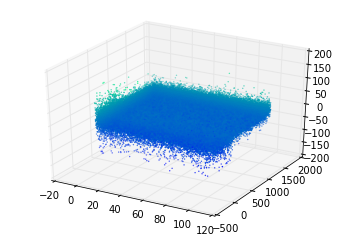

In [26]:
fig=plt.figure()
ax=fig.gca(projection='3d')

X = np.arange(0, data_clean.shape[1],1)
Y = np.arange(0, data_clean.shape[0],1)

X, Y = np.meshgrid(X,Y)

surf = ax.scatter(X, Y, data_clean, '.', c=data_clean,s=2,lw=0,cmap='winter')

In [27]:
%matplotlib notebook

/home/itoledo/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning:

The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.



<IPython.core.display.Javascript object>


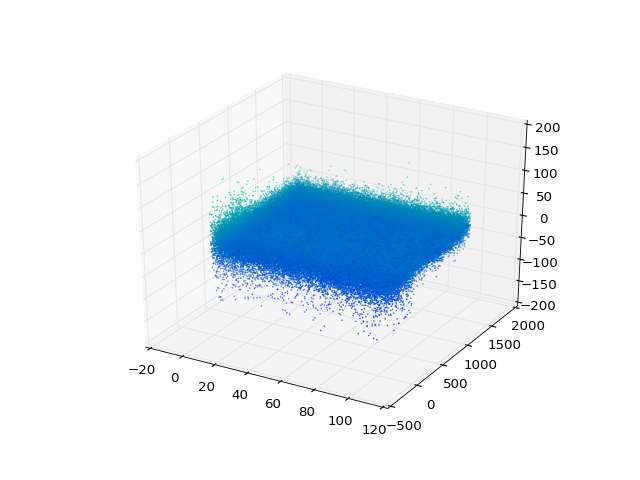

In [28]:
fig=plt.figure()
ax=fig.gca(projection='3d')

X = np.arange(0, data_clean.shape[1],1)
Y = np.arange(0, data_clean.shape[0],1)

X, Y = np.meshgrid(X,Y)

surf = ax.scatter(X, Y, data_clean, '.', c=data_clean,s=2,lw=0,cmap='winter')

In [ ]:
data_clean2.plot(kind='scatter', x='chan', y=0)

In [30]:
import seaborn as sns

In [31]:
data_clean2.plot(kind='scatter', x='level_1', y=0)

<IPython.core.display.Javascript object>

In [33]:
data_ready['noise'] = todegclean.iloc[:,2:].std(axis=1)

In [34]:
data_ready[['ant1name', 'ant2name', 'noise']]

chan,ant1name,ant2name,noise
0,CM01@N602,CM01@N602,0.000000
1,CM01@N602,CM03@J503,46.701189
2,CM01@N602,CM04@N605,29.383893
3,CM01@N602,CM05@J506,32.762628
4,CM01@N602,CM06@N606,22.967508
5,CM01@N602,CM07@N601,36.359303
6,CM01@N602,CM08@J505,40.407661
7,CM01@N602,CM10@J501,45.914936
8,CM01@N602,CM11@N604,40.565732
9,CM01@N602,CM12@J504,29.640146


In [35]:
corr = data_ready[['ant1name', 'ant2name', 'noise']].pivot_table(index=['ant1name'], columns=['ant2name'])

In [36]:
corr.columns.levels[1]

Index([u'CM01@N602', u'CM03@J503', u'CM04@N605', u'CM05@J506', u'CM06@N606',
       u'CM07@N601', u'CM08@J505', u'CM10@J501', u'CM11@N604', u'CM12@J504',
       u'DA41@A137', u'DA42@A006', u'DA43@A040', u'DA45@A030', u'DA46@A058',
       u'DA47@A070', u'DA48@A043', u'DA49@A029', u'DA50@A071', u'DA51@A013',
       u'DA52@A035', u'DA53@A069', u'DA54@A019', u'DA55@A060', u'DA56@A028',
       u'DA58@A001', u'DA60@A036', u'DA61@A075', u'DA62@A046', u'DA63@A018',
       u'DA64@A066', u'DV01@A072', u'DV02@A010', u'DV04@A016', u'DV05@A062',
       u'DV06@A014', u'DV07@A038', u'DV08@A031', u'DV09@A026', u'DV10@A024',
       u'DV11@A023', u'DV12@A037', u'DV13@A027', u'DV14@A050', u'DV15@A044',
       u'DV16@A002', u'DV17@A042', u'DV18@A015', u'DV19@A033', u'DV20@A034',
       u'DV21@A003', u'DV22@A011', u'DV24@A004', u'DV25@A005', u'PM03@T701',
       u'PM04@T703'],
      dtype='object', name=u'ant2name')

In [37]:
corr2 = pd.DataFrame(corr.values, index=corr.index.values, columns=corr.columns.levels[1].values)

In [38]:
corr2.head(10)

,CM01@N602,CM03@J503,CM04@N605,CM05@J506,CM06@N606,CM07@N601,CM08@J505,CM10@J501,CM11@N604,CM12@J504,DA41@A137,DA42@A006,DA43@A040,DA45@A030,DA46@A058,DA47@A070,DA48@A043,DA49@A029,DA50@A071,DA51@A013,DA52@A035,DA53@A069,DA54@A019,DA55@A060,DA56@A028,DA58@A001,DA60@A036,DA61@A075,DA62@A046,DA63@A018,DA64@A066,DV01@A072,DV02@A010,DV04@A016,DV05@A062,DV06@A014,DV07@A038,DV08@A031,DV09@A026,DV10@A024,DV11@A023,DV12@A037,DV13@A027,DV14@A050,DV15@A044,DV16@A002,DV17@A042,DV18@A015,DV19@A033,DV20@A034,DV21@A003,DV22@A011,DV24@A004,DV25@A005,PM03@T701,PM04@T703
CM01@N602,0,46.701189,29.383893,32.762628,22.967508,36.359303,40.407661,45.914936,40.565732,29.640146,14.562694,29.335219,20.716412,26.895287,30.763235,26.697059,21.704298,29.767285,25.722017,28.304617,20.825994,27.059823,20.932070,27.569773,18.449519,23.757780,24.002798,27.335629,30.049696,25.246969,29.683623,23.245331,22.309308,31.924065,33.016372,18.007862,21.194382,33.539958,33.306738,16.843515,15.857228,24.498334,29.873141,29.224887,35.650515,22.555083,21.503388,30.084713,29.566622,36.291291,31.340312,29.695347,22.190050,21.886667,25.232745,22.464967
CM03@J503,NaN,0.000000,31.432469,34.565426,28.898684,41.343540,41.287185,36.750653,43.272902,36.360817,19.072470,28.172877,31.589835,20.324977,25.222988,34.290881,19.731949,27.391348,24.770708,26.349812,26.826744,31.786525,19.252638,26.588475,17.893450,32.471885,28.890384,26.042497,38.131083,24.462237,17.581102,18.870217,23.375112,27.263902,35.089902,19.659566,16.388995,37.938527,27.843613,21.284379,14.384394,17.857470,28.260179,33.006305,36.830325,31.709295,17.676615,29.996775,30.069986,36.487383,28.591841,30.867809,33.508672,24.229324,22.751472,18.951222
CM04@N605,NaN,NaN,0.000000,31.295082,26.560044,34.550434,34.467081,37.765496,43.869704,30.044011,24.509697,19.955961,17.306417,19.855516,31.415264,24.072058,17.019296,22.474032,22.497364,20.939868,13.100727,25.638053,21.491669,31.330782,23.937664,24.843116,18.190094,22.820419,19.022639,23.514592,21.023196,27.635068,37.740859,23.443081,24.327150,21.112013,24.061417,26.452478,18.233747,24.718942,22.459439,32.231922,20.916312,23.573149,20.754104,26.071206,25.095631,24.139160,21.127660,17.031517,17.403966,24.498587,26.896798,25.160866,10.479282,18.148091
CM05@J506,NaN,NaN,NaN,0.000000,27.337777,30.437090,41.972751,30.785165,29.734097,20.720643,20.799933,21.448244,18.288241,23.905233,17.652885,14.059457,18.937433,15.696286,12.739377,13.926555,18.631403,22.707294,18.370213,27.393914,21.727290,20.008956,17.166186,11.864350,23.665885,14.651699,25.741726,19.852929,22.282725,18.558904,19.540648,16.615687,19.544251,17.351048,21.087760,16.283782,15.912257,25.404681,15.949068,21.269475,16.594564,18.117667,23.314644,23.579104,22.378915,25.126256,24.411295,17.507247,21.921871,23.921803,16.069114,17.703257
CM06@N606,NaN,NaN,NaN,NaN,0.000000,34.664479,32.126700,38.259208,33.504473,21.713732,21.034369,22.436531,13.695928,17.732706,28.966500,15.209696,18.267601,17.208361,17.909010,19.506435,12.560071,22.615656,17.772853,39.034696,21.401781,25.121586,18.924077,15.503819,25.162943,15.433467,21.756208,18.342412,26.560314,15.314605,18.951342,18.825378,21.133886,17.108759,21.034012,22.013614,18.917857,31.452148,19.794824,24.317781,15.961404,23.944970,18.443807,26.869264,29.175627,26.334467,17.960647,19.261183,23.563726,20.337431,14.192556,15.325694
CM07@N601,NaN,NaN,NaN,NaN,NaN,0.000000,24.700457,34.068774,44.171329,36.786104,17.764675,17.729929,26.484765,27.961804,26.892633,24.423133,17.602057,20.688815,22.074484,21.699366,22.045522,26.835583,24.113233,31.618131,28.302889,16.609255,13.550559,22.603558,26.158264,22.677964,18.158340,22.058445,34.727400,21.976650,30.385554,19.338211,19.151293,24.432411,16.122119,18.707818,20.454579,23.286894,28.134115,21.777714,23.981640,27.362826,22.191842,19.912613,28.148631,25.292925,21.780434,26.282274,22.164717,13.575950,19.116771,18.779214
CM08@J505,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,32.294124,35.771758,27.714511,28.385159,34.577743,26.404404,23.001407,29.339494

<IPython.core.display.Javascript object>


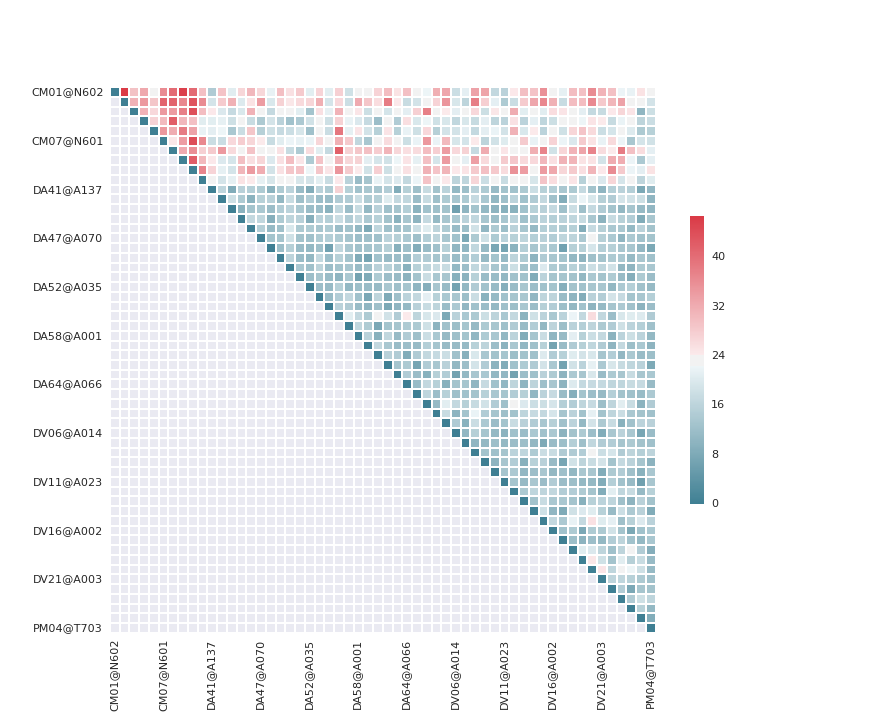

In [39]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2, cmap=cmap,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [40]:
?sns.heatmap